<a href="https://colab.research.google.com/github/EmaLascurain/Algoritmos/blob/main/DeLaCasaDegiorgioLopez_TPLC_Parte_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico de Laboratorio Computacional - Parte II

<img src='https://drive.google.com/uc?id=1H-FZSoVFnRWrdLJEn2l4K6TyOgv0NSMr'
width="500"
height="400">

<img src='https://drive.google.com/uc?id=1dXLZfhmxScAUJEdATyTZONP3FXqgIH67'
width="1200"
height="400">

El presente notebook será utilizando para el desarrollo de las actividades correspondientes a la Parte II del Trabajo Práctico de Laboratorio Computacional (TPLC) de Cálculo Vectorial. Se recomienda que realice todas las actividades que impliquen cálculo con software en este documento


**Aclaración:** Para poder utilizar las funciones provistas por la cátedra deberá cargar el archivos FUNCIONES_CV.py al entorno de trabajo de Colab. Para esto, deberá ejecutar la siguiente línea de código. Al hacerlo, debe hacer click en el botón *Examinar...* y buscar en su computadora el archivo para cargarlo.

In [ ]:
#Importar repositorio de la cátedra
!git clone https://github.com/joaquinr-uner/cvyed

fatal: destination path 'cvyed' already exists and is not an empty directory.


In [ ]:
!pip install numpy-stl
!pip install sympy_plot_backends

In [ ]:
# importar modulos necesarios
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as mtri
from scipy.spatial import Delaunay
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
t = sp.symbols('t')


In [ ]:
#from cvyed import cilindro
from cvyed import grilla_3d , elipse, cilindro, anillo_3d

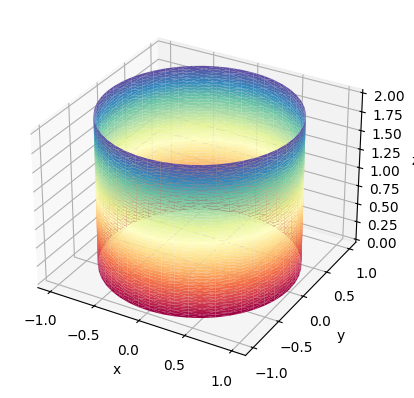

In [ ]:
fig1 = cilindro(1,2)
fig2 = grilla_3d(-1,1,-1,1,0,2,5)

In [ ]:
# Función Cilindro (nueva)

#def cilindro(r1, r2, h, x0=0, y0=0, z0=0, num_puntos=100):
    """
    Genera coordenadas para la superficie del cilindro perforado, incluyendo bases y lados.

    Parámetros:
    r1: Radio menor (agujero interno).
    r2: Radio mayor (cuerpo externo).
    h: Altura del cilindro.
    x0, y0, z0: Coordenadas del centro de la base del cilindro.
    num_puntos: Número de puntos para la malla.

    Retorna:
    (X_ext, Y_ext, Z_ext): Superficie exterior.
    (X_int, Y_int, Z_int): Superficie interior.
    (X_base_sup, Y_base_sup, Z_base_sup): Base superior.
    (X_base_inf, Y_base_inf, Z_base_inf): Base inferior.
    """
    theta = np.linspace(0, 2 * np.pi, num_puntos)
    z = np.linspace(z0, z0 + h, num_puntos)

    theta_mesh, z_mesh = np.meshgrid(theta, z)

    # **Superficie exterior**
    X_ext = x0 + r2 * np.cos(theta_mesh)
    Y_ext = y0 + r2 * np.sin(theta_mesh)
    Z_ext = z_mesh

    # **Superficie interior**
    X_int = x0 + r1 * np.cos(theta_mesh)
    Y_int = y0 + r1 * np.sin(theta_mesh)
    Z_int = z_mesh

    # **Base superior**
    X_base_sup = x0 + np.linspace(r1 * np.cos(theta), r2 * np.cos(theta), num_puntos)
    Y_base_sup = y0 + np.linspace(r1 * np.sin(theta), r2 * np.sin(theta), num_puntos)
    Z_base_sup = np.full_like(X_base_sup, z0 + h)

    # **Base inferior**
    X_base_inf = x0 + np.linspace(r1 * np.cos(theta), r2 * np.cos(theta), num_puntos)
    Y_base_inf = y0 + np.linspace(r1 * np.sin(theta), r2 * np.sin(theta), num_puntos)
    Z_base_inf = np.full_like(X_base_inf, z0)

    return X_ext, Y_ext, Z_ext, X_int, Y_int, Z_int, X_base_sup, Y_base_sup, Z_base_sup, X_base_inf, Y_base_inf, Z_base_inf


IndentationError: unexpected indent (<ipython-input-74-4586b1ee100b>, line 4)

TypeError: cannot unpack non-iterable NoneType object

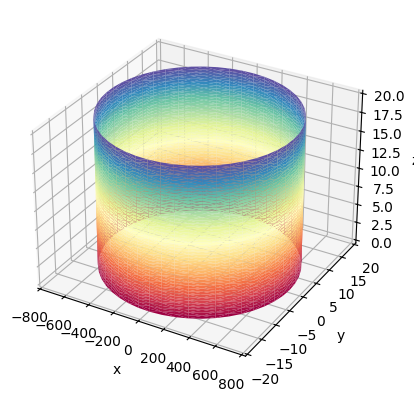

In [ ]:
# Generación 2 cilindros de la parte "Housing"

# Parámetros de los cilindros
r1_cil1, r2_cil1, h_cil1 = 18, 20, 5  # Cilindro 1
x0_cil1, y0_cil1, z0_cil1 = 0, 0, 0  # Posición del cilindro 1

r1_cil2, r2_cil2, h_cil2 = 20, 22, 1  # Cilindro 2
x0_cil2, y0_cil2, z0_cil2 = 0, 0, -1  # Posición del cilindro 2

num_puntos = 40

# Obtener coordenadas del primer cilindro
X_ext1, Y_ext1, Z_ext1, X_int1, Y_int1, Z_int1, X_base_sup1, Y_base_sup1, Z_base_sup1, X_base_inf1, Y_base_inf1, Z_base_inf1 = cilindro(r1_cil1, r2_cil1, h_cil1, x0_cil1, y0_cil1, z0_cil1, num_puntos)

# Obtener coordenadas del segundo cilindro
X_ext2, Y_ext2, Z_ext2, X_int2, Y_int2, Z_int2, X_base_sup2, Y_base_sup2, Z_base_sup2, X_base_inf2, Y_base_inf2, Z_base_inf2 = cilindro(r1_cil2, r2_cil2, h_cil2, x0_cil2, y0_cil2, z0_cil2, num_puntos)

# Crear la figura
fig = go.Figure()

# **Añadir el primer cilindro**
fig.add_trace(go.Surface(x=X_ext1, y=Y_ext1, z=Z_ext1, colorscale='Blues', opacity=0.8))
fig.add_trace(go.Surface(x=X_int1, y=Y_int1, z=Z_int1, colorscale='Reds', opacity=0.5))
fig.add_trace(go.Surface(x=X_base_sup1, y=Y_base_sup1, z=Z_base_sup1, colorscale='Greens', opacity=0.7))
fig.add_trace(go.Surface(x=X_base_inf1, y=Y_base_inf1, z=Z_base_inf1, colorscale='Greens', opacity=0.7))

# **Añadir el segundo cilindro**
fig.add_trace(go.Surface(x=X_ext2, y=Y_ext2, z=Z_ext2, colorscale='Purples', opacity=0.8))
fig.add_trace(go.Surface(x=X_int2, y=Y_int2, z=Z_int2, colorscale='Oranges', opacity=0.5))
fig.add_trace(go.Surface(x=X_base_sup2, y=Y_base_sup2, z=Z_base_sup2, colorscale='Greys', opacity=0.7))
fig.add_trace(go.Surface(x=X_base_inf2, y=Y_base_inf2, z=Z_base_inf2, colorscale='Greys', opacity=0.7))

# Configuración de la gráfica
fig.update_layout(
    title="Visualización de múltiples cilindros",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),
)

# Mostrar la gráfica
fig.show()

Wrote 4802 facets


<Figure size 640x480 with 0 Axes>

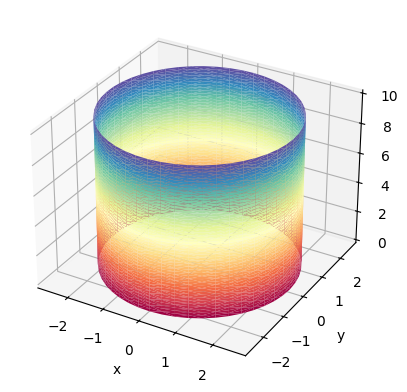

In [ ]:
cilindro_exterior = plt.figure()
cilindro_exterior = cilindro(2.5, 10, archivo='cilindro_exterior.stl')
#aspect('equal') #Correr esta línea posteriormente a la generación de las gráficas

Wrote 4802 facets


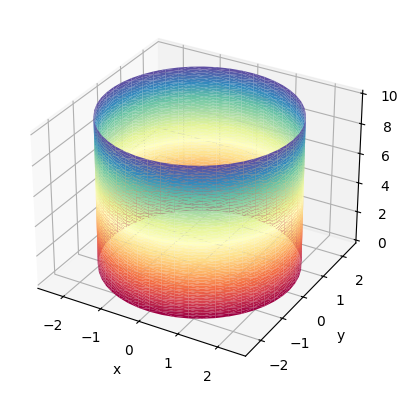

In [ ]:
cilindro_interior = cilindro(2.35, 10, archivo='cilindro_interior.stl')

Wrote 4802 facets


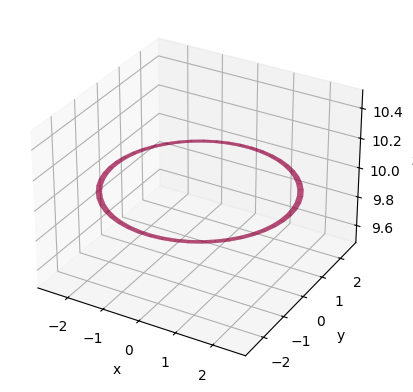

In [ ]:
tapa_superior = anillo_3d(0,0,10,2.35,2.5,archivo='tapa_superior.stl')

Wrote 4802 facets


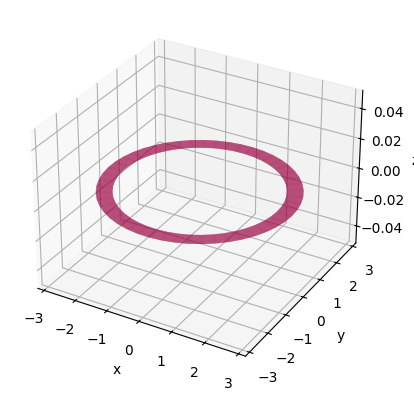

In [ ]:
base = anillo_3d(0,0,0,2.35,2.8,archivo='base.stl')

Wrote 19602 facets


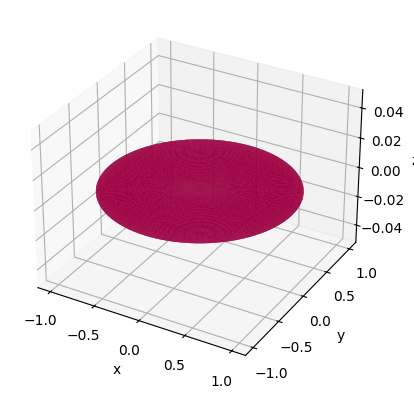

In [ ]:
orejas = elipse(1,1,0,0,0,0,archivo='orejas.stl')

Wrote 4802 facets


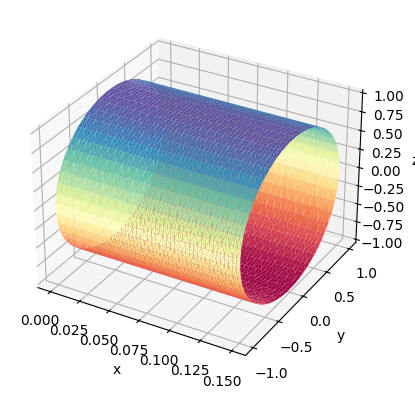

In [ ]:
cilindro_oreja = cilindro(1,0.15,0,0,0,1,archivo='cilindro_oreja.stl')

/content/cvyed/surf2stl.py:240: RuntimeWarning:

invalid value encountered in divide



Wrote 4802 facets


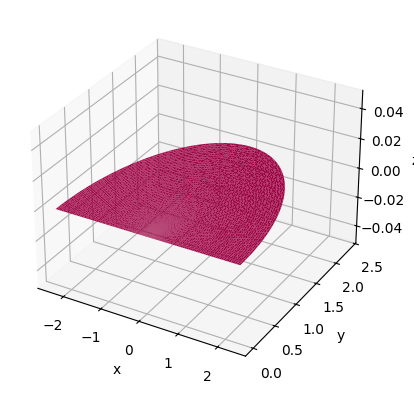

In [ ]:
leaflets = anillo_3d(0,0,0,0,2.35,0,angulo=sp.pi,archivo='leaflets.stl')

Wrote 4802 facets


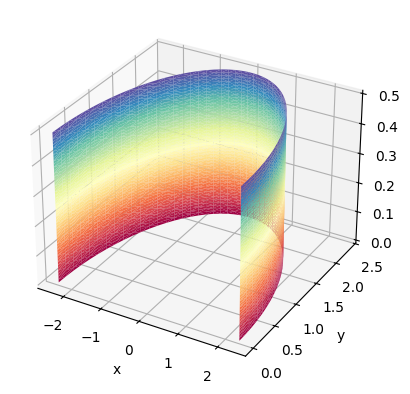

In [ ]:
tapa_leaflets = cilindro(2.35, 0.5,0,0,0,0,t=np.pi,archivo='tapa_leaflets.stl')